last_trainingdate=2023-01-06:
Above is data_training
Above  is data_test
Above is training_data.head())
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_56 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_57 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_57 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_58 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_58 (Dropout)        (None, 60, 80)            0         
               

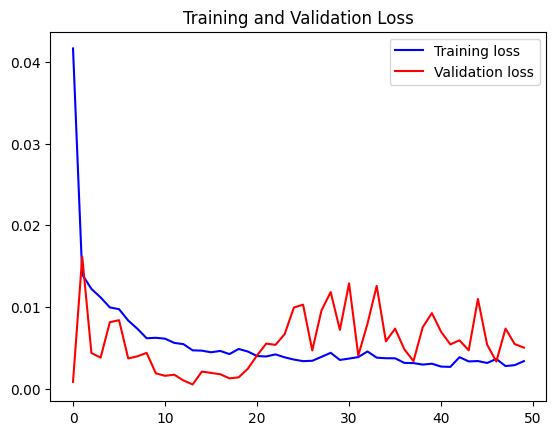

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import IPython
from IPython.display import display, HTML, Javascript
from datetime import datetime, timedelta

def preprocess_data(data_url):
    df = pd.read_csv(data_url)
    df = df.drop(['Adj Close'], axis=1)
    #df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
    return df


def configure_browser_state():
  display(IPython.core.display.HTML('''
    <canvas id="myChart"></canvas>
  '''))
  display(IPython.core.display.HTML('''
        <script src="https://cdn.jsdelivr.net/npm/chart.js@2.8.0"></script>
        <script>
          var ctx = document.getElementById('myChart').getContext('2d');
          var chart = new Chart(ctx, {
              // The type of chart we want to create
              type: 'line',

              // The data for our dataset
              data: {
                  labels: [],
                  datasets: [{
                      label: 'Actual',
                      borderColor: 'rgb(255, 99, 132)',
                      data: []
                  }, 
                  {
                      label: 'Predicted',
                      borderColor: 'rgb(155, 199, 32)',
                      data: []
                  }]
              },

              // Configuration options go here
            //  options: { animation: {duration: 0} ,
            //    scales: {x: {
             //              type: 'time',
             //              time: { unit: 'day',displayFormats: {day: 'YYYY-MM-DD'},tooltipFormat: 'YYYY-MM-DD'},
             //              title: {display: true, text: 'Date'}},
             //          y: {
             //              title: { display: true, text: 'value'}},
              //           //xAxes: [{ type : 'time', scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}],
              //            xAxes: [{type: 'time',time: {unit: 'day',displayFormats: {day: 'YYYY-MM-DD'}},scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}],
               //         yAxes: [{scaleLabel: {display: true, labelString: 'BitCoin Price [Normalised]'} }], },
               // title: { display: true, text: 'Bitcoin Price - Realtime Prediction'}}});

                             // Configuration options go here
              options: { animation: {duration: 0} ,
                scales: {x: {
                           type: 'time',
                           time: { unit: 'day',unitStepSize: 1,displayFormats: {day: 'YYYY-MM-DD'},tooltipFormat: 'YYYY-MM-DD'},
                           title: {display: true, text: 'Date'}},
                         y: {
                           title: { display: true, text: 'value'}},
                         xAxes: [{ scaleLabel: { display: true, labelString: 'Timestamp [YYYY-MM-DD]'}}], 
                        // xAxes : [time: { unit: 'day',unitStepSize: 1,displayFormats: {day: 'YYYY MM DD'},tooltipFormat: 'YYYY MM DD'},],
                        yAxes: [{scaleLabel: {display: true, labelString: 'BitCoin Price [$USD Normalised]'} }], },
                title: { display: true, text: 'Bitcoin Price - Realtime Prediction'}}});


          function getEpoch(offset_sec=0) {
             var now     = new Date(); 
             return Math.floor((now.getTime() - offset_sec*1000)/1000);}

          function getDateTime(offset_sec=0) {
             var now     = new Date(); 
             var numberOfMlSeconds = now.getTime() + offset_sec*1000;
             var update_now = new Date (numberOfMlSeconds);
             var year    = update_now.getFullYear();
             var month   = update_now.getMonth()+1; 
             var day     = update_now.getDate();
             var hour    = update_now.getHours();
             var minute  = update_now.getMinutes();
             var second  = update_now.getSeconds(); 
             if(month.toString().length == 1) {
                 month = '0'+month;}
             if(day.toString().length == 1) {
                 day = '0'+day;}   
             if(hour.toString().length == 1) {
                 hour = '0'+hour;}
             if(minute.toString().length == 1) {
                 minute = '0'+minute; }
             if(second.toString().length == 1) {
                 second = '0'+second;}   
             //var dateTime = year+'-'+month+'-'+day+' '+hour+':'+minute+':'+second;   
             var dateTime = year+'-'+month+'-'+day;  
             return dateTime;
          }

          function addData(current, predicted, day){
            chart.data.labels.push(day)
            if (chart.data.datasets[1].data.length > 0)
            //chart.data.datasets[0].data[chart.data.datasets[0].data.length - 1] = current
               chart.data.datasets[0].data.push(current)
            chart.data.datasets[1].data.push(predicted)
            // optional windowing
            if(chart.data.labels.length > 100) {
              chart.data.labels.shift()
              chart.data.datasets[0].data.shift()
              chart.data.datasets[1].data.shift() 
            }
            chart.update();
          }
        </script>
        '''))
    

url = 'https://raw.githubusercontent.com/AnsonCNS/COMS4507/main/BTC-USD_2023-05-07.csv'
data = preprocess_data(url)
#data = pd.read_csv(SKELETON_DIR+'BTC-USD.csv', date_parser = True)
last_date = datetime.strptime(data['Date'][data.shape[0]-1],'%Y-%m-%d')

#separate the last 120 days to simulate as live daily data
last_trainingdate = str(last_date+timedelta(days=-120))

print("last_trainingdate="+last_trainingdate[0:10]+":")

data_training = data[data['Date']< last_trainingdate[0:10]].copy()
data_training
print("Above is data_training")

data_test = data[data['Date']< last_trainingdate[0:10]].copy()
data_test
print("Above  is data_test")

live_data = data[data['Date'] >= last_trainingdate[0:10]].copy()

training_data = data_training.drop(['Date'], axis = 1)
training_data.head()
print("Above is training_data.head())")

scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
  X_train.append(training_data[i-60:i])
  Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
#Initialize the RNN
model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))

model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units =1))
model.summary()

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

history= model.fit(X_train, Y_train, epochs = 50, batch_size =50, validation_split=0.1)
                   
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()




<ipython-input-31-10db86d4db07>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= part_60_days.append(live_data, ignore_index = True)


days= 0      2022-11-07
1      2022-11-08
2      2022-11-09
3      2022-11-10
4      2022-11-11
          ...    
176    2023-05-02
177    2023-05-03
178    2023-05-04
179    2023-05-05
180    2023-05-06
Name: Date, Length: 181, dtype: object
inputs.shape[0]= 181
x1= [0.05200221 0.03097364 0.05991204 0.05181549 0.04053279]
y1= 0.05070356485011096
1/1 [==============================] - 1s 874ms/step
days= 2023-01-06


<IPython.core.display.Javascript object>

x1= [0.05070356 0.03627387 0.05619726 0.05750496 0.04710151]
y1= 0.05626583620915537
1/1 [==============================] - 0s 73ms/step
days= 2023-01-07


<IPython.core.display.Javascript object>

x1= [ 0.05626584  0.03544051  0.06614388  0.05765848 -0.01393732]
y1= 0.0563634412997257
1/1 [==============================] - 0s 62ms/step
days= 2023-01-08


<IPython.core.display.Javascript object>

x1= [0.05636344 0.04114103 0.06663975 0.0643766  0.00477882]
y1= 0.06308974076751728
1/1 [==============================] - 0s 59ms/step
days= 2023-01-09


<IPython.core.display.Javascript object>

x1= [0.06308974 0.05580933 0.07518679 0.06958111 0.08547187]
y1= 0.0678493766083832
1/1 [==============================] - 0s 58ms/step
days= 2023-01-10


<IPython.core.display.Javascript object>

x1= [0.06784938 0.06046115 0.07865697 0.08191165 0.05980948]
y1= 0.08003789973552766
1/1 [==============================] - 0s 60ms/step
days= 2023-01-11


<IPython.core.display.Javascript object>

x1= [0.0800379  0.08255966 0.08745862 0.10603588 0.08317157]
y1= 0.1123229345287734
1/1 [==============================] - 0s 62ms/step
days= 2023-01-12


<IPython.core.display.Javascript object>

x1= [0.11232293 0.13632112 0.12051229 0.15218519 0.23441842]
y1= 0.14845956743453081
1/1 [==============================] - 0s 69ms/step
days= 2023-01-13


<IPython.core.display.Javascript object>

x1= [0.14845957 0.18218142 0.15863318 0.20353332 0.18205935]
y1= 0.1985599344256186
1/1 [==============================] - 0s 64ms/step
days= 2023-01-14


<IPython.core.display.Javascript object>

x1= [0.19855993 0.23671008 0.21670586 0.25620161 0.27083313]
y1= 0.2498779701048377
1/1 [==============================] - 0s 85ms/step
days= 2023-01-15


<IPython.core.display.Javascript object>

x1= [0.24987797 0.23271453 0.25186933 0.25148641 0.0916102 ]
y1= 0.24529616533700782
1/1 [==============================] - 0s 69ms/step
days= 2023-01-16


<IPython.core.display.Javascript object>

x1= [0.24529617 0.25073629 0.25733929 0.26574726 0.15989463]
y1= 0.25941819072865746
1/1 [==============================] - 0s 89ms/step
days= 2023-01-17


<IPython.core.display.Javascript object>

x1= [0.25941819 0.25455466 0.27055591 0.26534667 0.14356168]
y1= 0.2587071481465333
1/1 [==============================] - 0s 76ms/step
days= 2023-01-18


<IPython.core.display.Javascript object>

x1= [0.25870715 0.26073206 0.24857802 0.24200576 0.18917196]
y1= 0.23589403860875868
1/1 [==============================] - 0s 53ms/step
days= 2023-01-19


<IPython.core.display.Javascript object>

x1= [0.23589404 0.24102345 0.2558121  0.26165713 0.10850745]
y1= 0.2550672000654117
1/1 [==============================] - 0s 68ms/step
days= 2023-01-20


<IPython.core.display.Javascript object>

x1= [0.2550672  0.31609696 0.26756813 0.34014969 0.17817887]
y1= 0.33164185547179637
1/1 [==============================] - 0s 54ms/step
days= 2023-01-21


<IPython.core.display.Javascript object>

x1= [0.33164186 0.34505878 0.34767174 0.34514002 0.21137419]
y1= 0.33647852329896155
1/1 [==============================] - 0s 56ms/step
days= 2023-01-22


<IPython.core.display.Javascript object>

x1= [0.33647852 0.33398353 0.34143862 0.34231539 0.14125096]
y1= 0.333741821951945
1/1 [==============================] - 0s 58ms/step
days= 2023-01-23


<IPython.core.display.Javascript object>

x1= [0.33374182 0.33740775 0.35483716 0.35288216 0.15739988]
y1= 0.3437721349442151
1/1 [==============================] - 0s 65ms/step
days= 2023-01-24


<IPython.core.display.Javascript object>

x1= [0.34377213 0.33777717 0.34957839 0.33817059 0.15636451]
y1= 0.32980642807108285
1/1 [==============================] - 0s 60ms/step
days= 2023-01-25


<IPython.core.display.Javascript object>

x1= [0.32980643 0.3666456  0.34235276 0.36193869 0.19536561]
y1= 0.35239746012222395
1/1 [==============================] - 0s 65ms/step
days= 2023-01-26


<IPython.core.display.Javascript object>

x1= [0.35239746 0.34283656 0.36776616 0.35773787 0.15593415]
y1= 0.3486343548369073
1/1 [==============================] - 0s 59ms/step
days= 2023-01-27


<IPython.core.display.Javascript object>

x1= [0.34863435 0.35170405 0.3548517  0.36000665 0.14705469]
y1= 0.3510030876821142
1/1 [==============================] - 0s 69ms/step
days= 2023-01-28


<IPython.core.display.Javascript object>

x1= [0.35100309 0.33934235 0.36763905 0.35765455 0.04982835]
y1= 0.3486695828744364
1/1 [==============================] - 0s 65ms/step
days= 2023-01-29


<IPython.core.display.Javascript object>

x1= [0.34866958 0.37635489 0.37147269 0.39436285 0.16564592]
y1= 0.3844159831444287
1/1 [==============================] - 0s 80ms/step
days= 2023-01-30


<IPython.core.display.Javascript object>

x1= [0.38441598 0.36994672 0.35500199 0.34822656 0.16365872]
y1= 0.33949958534644353
1/1 [==============================] - 0s 72ms/step
days= 2023-01-31


<IPython.core.display.Javascript object>

x1= [0.33949959 0.34224471 0.36043306 0.36299647 0.12386061]
y1= 0.35378657189105867
1/1 [==============================] - 0s 75ms/step
days= 2023-02-01


<IPython.core.display.Javascript object>

x1= [0.35378657 0.3687289  0.36607512 0.39185481 0.15889927]
y1= 0.38182714555229214
1/1 [==============================] - 0s 76ms/step
days= 2023-02-02


<IPython.core.display.Javascript object>

x1= [0.38182715 0.38849551 0.39579112 0.37941762 0.20795416]
y1= 0.36973472445304
1/1 [==============================] - 0s 84ms/step
days= 2023-02-03


<IPython.core.display.Javascript object>

x1= [0.36973472 0.36448589 0.38630363 0.37830429 0.16254226]
y1= 0.36862405511746177
1/1 [==============================] - 0s 67ms/step
days= 2023-02-04


<IPython.core.display.Javascript object>

x1= [0.36862406 0.35853859 0.3868991  0.37250412 0.05826922]
y1= 0.36313740661744354
1/1 [==============================] - 0s 73ms/step
days= 2023-02-05


<IPython.core.display.Javascript object>

x1= [0.36313741 0.35198459 0.36426503 0.35393058 0.09403261]
y1= 0.344945463235246
1/1 [==============================] - 0s 71ms/step
days= 2023-02-06


<IPython.core.display.Javascript object>

x1= [0.34494546 0.33705397 0.35673429 0.3442752  0.13285555]
y1= 0.33548199274341206
2/2 [==============================] - 0s 22ms/step
days= 2023-02-07


<IPython.core.display.Javascript object>

x1= [0.33548199 0.34646403 0.35996479 0.36916859 0.16349807]
y1= 0.35982672319822084
2/2 [==============================] - 0s 28ms/step
days= 2023-02-08


<IPython.core.display.Javascript object>

x1= [0.35982672 0.34926132 0.35869939 0.35312739 0.14694565]
y1= 0.3445868888511252
2/2 [==============================] - 0s 28ms/step
days= 2023-02-09


<IPython.core.display.Javascript object>

x1= [0.34458689 0.33102383 0.31056184 0.29781094 0.2125614 ]
y1= 0.2903534752370114
2/2 [==============================] - 0s 27ms/step
days= 2023-02-10


<IPython.core.display.Javascript object>

x1= [0.29035348 0.27922295 0.29876377 0.28952327 0.1624998 ]
y1= 0.28231321723048386
2/2 [==============================] - 0s 26ms/step
days= 2023-02-11


<IPython.core.display.Javascript object>

x1= [0.28231322 0.27677954 0.30273984 0.30037028 0.06480171]
y1= 0.2928495926682322
2/2 [==============================] - 0s 28ms/step
days= 2023-02-12


<IPython.core.display.Javascript object>

x1= [0.29284959 0.28510419 0.30597772 0.29628845 0.07814882]
y1= 0.2888140572484694
2/2 [==============================] - 0s 28ms/step
days= 2023-02-13


<IPython.core.display.Javascript object>

x1= [0.28881406 0.27712336 0.29477522 0.29727091 0.13370965]
y1= 0.28952697868299015
2/2 [==============================] - 0s 30ms/step
days= 2023-02-14


<IPython.core.display.Javascript object>

x1= [0.28952698 0.29649995 0.30344121 0.31764765 0.15989556]
y1= 0.3096686761648384
2/2 [==============================] - 0s 32ms/step
days= 2023-02-15


<IPython.core.display.Javascript object>

x1= [0.30966868 0.39539889 0.32609237 0.4206927  0.21174809]
y1= 0.41003784710236113
2/2 [==============================] - 0s 30ms/step
days= 2023-02-16


<IPython.core.display.Javascript object>

x1= [0.41003785 0.43595963 0.40252688 0.38690286 0.27401205]
y1= 0.3770394211975687
2/2 [==============================] - 0s 41ms/step
days= 2023-02-17


<IPython.core.display.Javascript object>

x1= [0.37703942 0.42564727 0.39539682 0.4334193  0.29261635]
y1= 0.4224445961721366
2/2 [==============================] - 0s 39ms/step
days= 2023-02-18


<IPython.core.display.Javascript object>

x1= [0.4224446  0.41950112 0.44607392 0.4371557  0.09458993]
y1= 0.4260389826958906
2/2 [==============================] - 0s 38ms/step
days= 2023-02-19


<IPython.core.display.Javascript object>

x1= [0.42603898 0.43394392 0.43899603 0.42167035 0.14861982]
y1= 0.41144584109007654
2/2 [==============================] - 0s 36ms/step
days= 2023-02-20


<IPython.core.display.Javascript object>

x1= [0.41144584 0.4303803  0.41889188 0.44643162 0.1798939 ]
y1= 0.43532293113310216
2/2 [==============================] - 0s 36ms/step
days= 2023-02-21


<IPython.core.display.Javascript object>

x1= [0.43532293 0.43560297 0.43259464 0.42703782 0.20052954]
y1= 0.41629387582273214
2/2 [==============================] - 0s 36ms/step
days= 2023-02-22


<IPython.core.display.Javascript object>

x1= [0.41629388 0.40347387 0.40462891 0.41481731 0.19094303]
y1= 0.4044281353816508
2/2 [==============================] - 0s 38ms/step
days= 2023-02-23


<IPython.core.display.Javascript object>

x1= [0.40442814 0.40837047 0.40712358 0.40290086 0.19346031]
y1= 0.3926580273395339
2/2 [==============================] - 0s 38ms/step
days= 2023-02-24


<IPython.core.display.Javascript object>

x1= [0.39265803 0.38537809 0.37257926 0.36590181 0.16007004]
y1= 0.35678255155003935
2/2 [==============================] - 0s 40ms/step
days= 2023-02-25


<IPython.core.display.Javascript object>

x1= [0.35678255 0.34151768 0.36526079 0.36477846 0.06247361]
y1= 0.35553322465836157
2/2 [==============================] - 0s 39ms/step
days= 2023-02-26


<IPython.core.display.Javascript object>

x1= [0.35553322 0.36332071 0.37645936 0.38382876 0.06742871]
y1= 0.3741616198296256
2/2 [==============================] - 0s 39ms/step
days= 2023-02-27


<IPython.core.display.Javascript object>

x1= [0.37416162 0.3733114  0.38257804 0.38193568 0.12224723]
y1= 0.3722563000143826
2/2 [==============================] - 0s 44ms/step
days= 2023-02-28


<IPython.core.display.Javascript object>

x1= [0.3722563  0.35993446 0.37612891 0.36339493 0.10288106]
y1= 0.35441635515316294
2/2 [==============================] - 0s 45ms/step
days= 2023-03-01


<IPython.core.display.Javascript object>

x1= [0.35441636 0.37442778 0.37668097 0.38804222 0.14048971]
y1= 0.37827728724835086
2/2 [==============================] - 0s 41ms/step
days= 2023-03-02


<IPython.core.display.Javascript object>

x1= [0.37827729 0.36748203 0.38454668 0.37959515 0.10152373]
y1= 0.37008202591517336
2/2 [==============================] - 0s 54ms/step
days= 2023-03-03


<IPython.core.display.Javascript object>

x1= [0.37008203 0.35472924 0.33265417 0.32465257 0.15324222]
y1= 0.31651484480905756
2/2 [==============================] - 0s 55ms/step
days= 2023-03-04


<IPython.core.display.Javascript object>

x1= [0.31651484 0.3019997  0.33193709 0.32419191 0.01750965]
y1= 0.3160925781319299
2/2 [==============================] - 0s 60ms/step
days= 2023-03-05


<IPython.core.display.Javascript object>

x1= [0.31609258 0.31223506 0.33737699 0.32824866 0.03710898]
y1= 0.3200689304467199
2/2 [==============================] - 0s 62ms/step
days= 2023-03-06


<IPython.core.display.Javascript object>

x1= [0.32006893 0.31079222 0.33859269 0.32796447 0.07388584]
y1= 0.3196603792526027
2/2 [==============================] - 0s 56ms/step
days= 2023-03-07


<IPython.core.display.Javascript object>

x1= [0.31966038 0.3080003  0.32249596 0.31759654 0.12320113]
y1= 0.309469332441088
2/2 [==============================] - 0s 58ms/step
days= 2023-03-08


<IPython.core.display.Javascript object>

x1= [0.30946933 0.29530983 0.30724627 0.29282621 0.12111566]
y1= 0.28559534245882334
2/2 [==============================] - 0s 59ms/step
days= 2023-03-09


<IPython.core.display.Javascript object>

x1= [0.28559534 0.27242571 0.23191872 0.22592175 0.19244344]
y1= 0.22051498309313278
2/2 [==============================] - 0s 61ms/step
days= 2023-03-10


<IPython.core.display.Javascript object>

x1= [0.22051498 0.20212483 0.20264495 0.21724295 0.27639563]
y1= 0.21189942782253124
3/3 [==============================] - 0s 40ms/step
days= 2023-03-11


<IPython.core.display.Javascript object>

x1= [0.21189943 0.22283678 0.22479475 0.23922251 0.19076345]
y1= 0.23306987777210175
3/3 [==============================] - 0s 40ms/step
days= 2023-03-12


<IPython.core.display.Javascript object>

x1= [0.23306988 0.291193   0.24391384 0.31484048 0.18255143]
y1= 0.3065817611657373
3/3 [==============================] - 0s 42ms/step
days= 2023-03-13


<IPython.core.display.Javascript object>

x1= [0.30658176 0.40732724 0.31781547 0.41524634 0.36649381]
y1= 0.4049594680383426
3/3 [==============================] - 0s 46ms/step
days= 2023-03-14


<IPython.core.display.Javascript object>

x1= [0.40495947 0.50373138 0.42660062 0.44232992 0.41347292]
y1= 0.43233493646453747
3/3 [==============================] - 0s 61ms/step
days= 2023-03-15


<IPython.core.display.Javascript object>

x1= [0.43233494 0.44118747 0.42075276 0.42405601 0.31354838]
y1= 0.41321748226237776
3/3 [==============================] - 0s 62ms/step
days= 2023-03-16


<IPython.core.display.Javascript object>

x1= [0.41321748 0.43871885 0.43383932 0.45747362 0.22434738]
y1= 0.4460042581838779
3/3 [==============================] - 0s 68ms/step
days= 2023-03-17


<IPython.core.display.Javascript object>

x1= [0.44600426 0.56622592 0.47055689 0.57454595 0.37801017]
y1= 0.5611025040122715
3/3 [==============================] - 0s 66ms/step
days= 2023-03-18


<IPython.core.display.Javascript object>

x1= [0.5611025  0.56318933 0.55510573 0.55193022 0.24126772]
y1= 0.5380821596476382
3/3 [==============================] - 0s 60ms/step
days= 2023-03-19


<IPython.core.display.Javascript object>

x1= [0.53808216 0.59826844 0.56875829 0.60489833 0.25991417]
y1= 0.5896479188625205
3/3 [==============================] - 0s 68ms/step
days= 2023-03-20


<IPython.core.display.Javascript object>

x1= [0.58964792 0.6025472  0.58561503 0.59149632 0.32373831]
y1= 0.5765071115453262
3/3 [==============================] - 0s 66ms/step
days= 2023-03-21


<IPython.core.display.Javascript object>

x1= [0.57650711 0.59821944 0.59551116 0.61166949 0.24472251]
y1= 0.5952811159255509
3/3 [==============================] - 0s 74ms/step
days= 2023-03-22


<IPython.core.display.Javascript object>

x1= [0.59528112 0.61607659 0.56132882 0.56879428 0.21993692]
y1= 0.5540724919481081
3/3 [==============================] - 0s 76ms/step
days= 2023-03-23


<IPython.core.display.Javascript object>

x1= [0.55407249 0.61246896 0.58262165 0.61947827 0.13645859]
y1= 0.6032360751491481
3/3 [==============================] - 0s 48ms/step
days= 2023-03-24


<IPython.core.display.Javascript object>

x1= [0.60323608 0.59570979 0.57537441 0.5779703  0.1524942 ]
y1= 0.5629889416086336
3/3 [==============================] - 0s 51ms/step
days= 2023-03-25


<IPython.core.display.Javascript object>

x1= [0.56298894 0.56642295 0.58326899 0.5780405  0.03771039]
y1= 0.5633826500948784
3/3 [==============================] - 0s 47ms/step
days= 2023-03-26


<IPython.core.display.Javascript object>

x1= [0.56338265 0.58538679 0.59578277 0.60270881 0.04222398]
y1= 0.5873616665456984
3/3 [==============================] - 0s 46ms/step
days= 2023-03-27


<IPython.core.display.Javascript object>

x1= [0.58736167 0.57850364 0.55361842 0.56052175 0.08150057]
y1= 0.5459406410536243
3/3 [==============================] - 0s 47ms/step
days= 2023-03-28


<IPython.core.display.Javascript object>

x1= [0.54594064 0.55016933 0.55719578 0.56685356 0.07780762]
y1= 0.5523926315345731
3/3 [==============================] - 0s 47ms/step
days= 2023-03-29


<IPython.core.display.Javascript object>

x1= [0.55239263 0.60705444 0.58645903 0.62019265 0.10424403]
y1= 0.6044880324245614
3/3 [==============================] - 0s 48ms/step
days= 2023-03-30


<IPython.core.display.Javascript object>

x1= [0.60448803 0.63357995 0.60961932 0.60464587 0.12019331]
y1= 0.5891986909925928
3/3 [==============================] - 0s 53ms/step
days= 2023-03-31


<IPython.core.display.Javascript object>

x1= [0.58919869 0.60805357 0.60275694 0.62661337 0.08890328]
y1= 0.6104132933722577
3/3 [==============================] - 0s 50ms/step
days= 2023-04-01


<IPython.core.display.Javascript object>

x1= [0.61041329 0.61603344 0.63863955 0.62328314 0.0148714 ]
y1= 0.6099089219083655
3/3 [==============================] - 0s 51ms/step
days= 2023-04-02


<IPython.core.display.Javascript object>

x1= [0.60990892 0.60211691 0.6178639  0.61282939 0.02770235]
y1= 0.5964527532830934
3/3 [==============================] - 0s 50ms/step
days= 2023-04-03


<IPython.core.display.Javascript object>

x1= [0.59645275 0.59998961 0.58731697 0.59263115 0.09396189]
y1= 0.5778000273027655
3/3 [==============================] - 0s 59ms/step
days= 2023-04-04


<IPython.core.display.Javascript object>

x1= [0.57780003 0.59793373 0.60766512 0.611288   0.05503673]
y1= 0.5958104758425391
3/3 [==============================] - 0s 58ms/step
days= 2023-04-05


<IPython.core.display.Javascript object>

x1= [0.59581048 0.61293012 0.61583583 0.61177653 0.07114432]
y1= 0.5960750148738765
3/3 [==============================] - 0s 58ms/step
days= 2023-04-06


<IPython.core.display.Javascript object>

x1= [0.59607501 0.58539858 0.61055477 0.60516815 0.04185446]
y1= 0.5895211918724406
3/3 [==============================] - 0s 64ms/step
days= 2023-04-07


<IPython.core.display.Javascript object>

x1= [0.58952119 0.5821199  0.61333459 0.59932815 0.01473664]
y1= 0.5838238327912795
3/3 [==============================] - 0s 58ms/step
days= 2023-04-08


<IPython.core.display.Javascript object>

x1= [0.58382383 0.58448939 0.61782863 0.60041119 0.00117445]
y1= 0.5853559233853394
3/3 [==============================] - 0s 59ms/step
days= 2023-04-09


<IPython.core.display.Javascript object>

x1= [0.58535592 0.60279782 0.61506718 0.61943276 0.02670626]
y1= 0.6038092117546099
3/3 [==============================] - 0s 59ms/step
days= 2023-04-10


<IPython.core.display.Javascript object>

x1= [0.60380921 0.66360072 0.6332128  0.68460276 0.09146434]
y1= 0.6671856617039169
3/3 [==============================] - 0s 62ms/step
days= 2023-04-11


<IPython.core.display.Javascript object>

x1= [0.66718566 0.69980944 0.70463176 0.7133422  0.09910785]
y1= 0.6949816118902483
4/4 [==============================] - 0s 45ms/step
days= 2023-04-12


<IPython.core.display.Javascript object>

x1= [0.69498161 0.69752174 0.71047962 0.70860202 0.08571964]
y1= 0.6786839972075216
4/4 [==============================] - 0s 48ms/step
days= 2023-04-13


<IPython.core.display.Javascript object>

x1= [0.678684   0.70131949 0.71817706 0.72143989 0.07511163]
y1= 0.7035421175022905
4/4 [==============================] - 0s 48ms/step
days= 2023-04-14


<IPython.core.display.Javascript object>

x1= [0.70354212 0.7241831  0.72651958 0.72571729 0.12224023]
y1= 0.7074470743398731
4/4 [==============================] - 0s 49ms/step
days= 2023-04-15


<IPython.core.display.Javascript object>

x1= [0.70744707 0.70435781 0.73664802 0.71746183 0.02456829]
y1= 0.6990408205712395
4/4 [==============================] - 0s 48ms/step
days= 2023-04-16


<IPython.core.display.Javascript object>

x1= [0.69904082 0.70208976 0.7322196  0.71730676 0.03289765]
y1= 0.6990970914381633
4/4 [==============================] - 0s 51ms/step
days= 2023-04-17


<IPython.core.display.Javascript object>

x1= [0.69909709 0.69048816 0.6878371  0.67433618 0.0786148 ]
y1= 0.6573453921569175
4/4 [==============================] - 0s 47ms/step
days= 2023-04-18


<IPython.core.display.Javascript object>

x1= [0.65734539 0.69790572 0.68177559 0.72136516 0.09326966]
y1= 0.7028026106646883
4/4 [==============================] - 0s 47ms/step
days= 2023-04-19


<IPython.core.display.Javascript object>

x1= [0.70280261 0.69499732 0.65738546 0.64360762 0.13965803]
y1= 0.6272645048456316
4/4 [==============================] - 0s 53ms/step
days= 2023-04-20


<IPython.core.display.Javascript object>

x1= [0.6272645  0.62948095 0.62556743 0.61513414 0.11021601]
y1= 0.5996344551663169
4/4 [==============================] - 0s 50ms/step
days= 2023-04-21


<IPython.core.display.Javascript object>

x1= [0.59963446 0.59382141 0.58231999 0.56728703 0.10492339]
y1= 0.5523379576176346
4/4 [==============================] - 0s 49ms/step
days= 2023-04-22


<IPython.core.display.Javascript object>

x1= [0.55233796 0.57036557 0.58192795 0.59397803 0.0353662 ]
y1= 0.578803885252797
4/4 [==============================] - 0s 77ms/step
days= 2023-04-23


<IPython.core.display.Javascript object>

x1= [0.57880389 0.56781795 0.593533   0.58281385 0.03226557]
y1= 0.5680100164200756
4/4 [==============================] - 0s 77ms/step
days= 2023-04-24


<IPython.core.display.Javascript object>

x1= [0.56801002 0.57565928 0.57696289 0.57955296 0.07707583]
y1= 0.5643133276988088
4/4 [==============================] - 0s 74ms/step
days= 2023-04-25


<IPython.core.display.Javascript object>

x1= [0.56431333 0.59485764 0.58385729 0.61817604 0.07734996]
y1= 0.6020791866121706
4/4 [==============================] - 0s 84ms/step
days= 2023-04-26


<IPython.core.display.Javascript object>

x1= [0.60207919 0.67461489 0.58972244 0.62385914 0.20601614]
y1= 0.6082552711562916
4/4 [==============================] - 0s 75ms/step
days= 2023-04-27


<IPython.core.display.Javascript object>

x1= [0.60825527 0.66851361 0.64395637 0.6757553  0.16318353]
y1= 0.6588807706825488
4/4 [==============================] - 0s 52ms/step
days= 2023-04-28


<IPython.core.display.Javascript object>

x1= [0.65888077 0.65384809 0.67044736 0.66916263 0.07562867]
y1= 0.651933145259463
4/4 [==============================] - 0s 52ms/step
days= 2023-04-29


<IPython.core.display.Javascript object>

x1= [0.65193315 0.64794096 0.67841562 0.66463143 0.01292298]
y1= 0.6475537842761443
4/4 [==============================] - 0s 56ms/step
days= 2023-04-30


<IPython.core.display.Javascript object>

x1= [0.64755378 0.67246438 0.67972218 0.66563462 0.049275  ]
y1= 0.6466681985525555
4/4 [==============================] - 0s 52ms/step
days= 2023-05-01


<IPython.core.display.Javascript object>

x1= [0.6466682  0.64192665 0.60763938 0.60750984 0.08575308]
y1= 0.5918399478595533
4/4 [==============================] - 0s 52ms/step
days= 2023-05-02


<IPython.core.display.Javascript object>

x1= [0.59183995 0.61990368 0.61987743 0.63658949 0.06550057]
y1= 0.6203773777193864
4/4 [==============================] - 0s 55ms/step
days= 2023-05-03


<IPython.core.display.Javascript object>

x1= [0.62037738 0.63847069 0.63266546 0.65267408 0.09001168]
y1= 0.6372506654078076
4/4 [==============================] - 0s 58ms/step
days= 2023-05-04


<IPython.core.display.Javascript object>

x1= [0.63725067 0.64306796 0.65859959 0.64484351 0.05744351]
y1= 0.6286014790977601
4/4 [==============================] - 0s 55ms/step
days= 2023-05-05


<IPython.core.display.Javascript object>

x1= [0.62860148 0.65856635 0.66621766 0.67874724 0.07920141]
y1= 0.6616630336350307
4/4 [==============================] - 0s 57ms/step
days= 2023-05-06


<IPython.core.display.Javascript object>

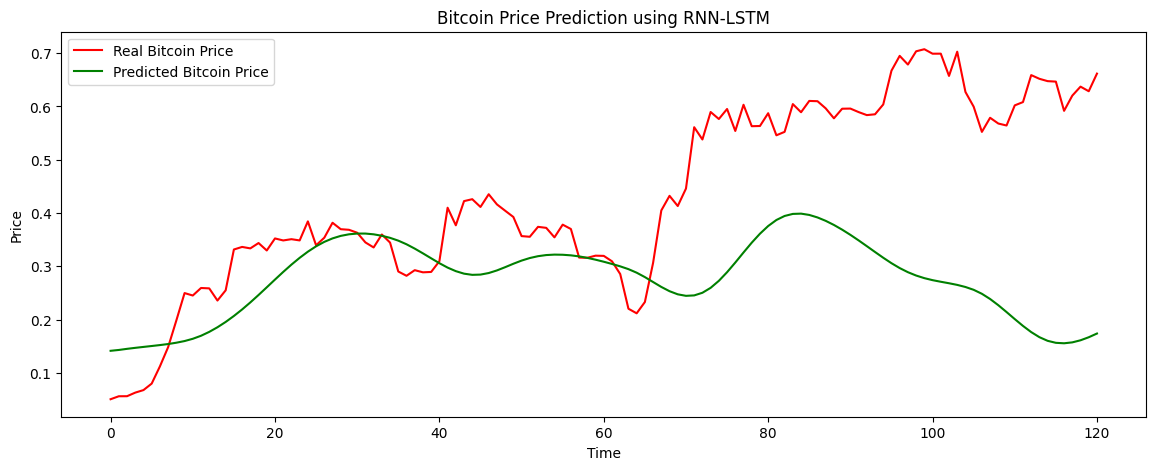

In [31]:
# Ready graph display
configure_browser_state() 

part_60_days = data_training.tail(60)
df= part_60_days.append(live_data, ignore_index = True)
days = df['Date']
df = df.drop(['Date'], axis = 1)
df.head()

print("days=",days)
inputs = scaler.transform(df) 
inputs

X_test = []
Y_test = []
Y_pred = -1
print("inputs.shape[0]=",inputs.shape[0])
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i]) 
    Y_test.append(inputs[i, 0])
    x1 = X_test[-1][-1]
    y1 = Y_test[-1]
    print("x1=",x1)
    print("y1=",y1)
    #if Y_pred != -1:
    #    model.train_on_batch(x1, y1)
    Y_pred = model.predict(np.array(X_test))
    print("days=",days[i])
    display(Javascript('addData('+str(Y_test[-1])+','+str(Y_pred[-1])+',"'+str(days[i])+'")'))

plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

